**_<div style="text-align: center"> - - -   Ahmed Gurbuz | SMU Data Science Bootcamp   - - -</div>_**

# WeatherPy
----

#### This Python script visualizes the weather of randomly selected 500+ cities across the world of varying distance from the equator and builds a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from pprint import pprint

# Import API key
from config import openweatherkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Performing API Calls
* Performing a weather check on each city using a series of successive API calls.
* Including a print log of each city as it'sbeing processed (with the city number and city name).



In [3]:
# Create a settings dictionary with your API key and preferred unit
params = {"units": "imperial", "appid": openweatherkey}

# Define base url derived from Open Weather API docs
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create a for loop to see if query url built upon the base url works or not 
# Check first 10 cities API response objects
counter = 0
for city in cities:
    params['q'] = city
    if counter == 5:
        break
    response = requests.get(base_url, params = params)
    print(response)
    counter = counter + 1

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [4]:
#Create Data Frame for the features we will be analyzing for each city
data_df = pd.DataFrame(columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng', 'Max Temp', 'Wind Speed'])

In [6]:
#Create counters for the loop
record_count = 1

#Create loop
#Gathering information from Openweather API for each city
for i, city in enumerate(cities): 
    params["q"] = city
    
    # Create conditional
    # Create a set for every 60 cities
    if (i % 60 == 0 and i > 50):
        record_count = 1

    # Giving a break while fetching data not to exceed API (Open Weather API restricts 60 calls per minute for free accounts)
        time.sleep(50)
    
    # Create try/except condition to catch and see that city information can be found or not from API call
    try:
        print(f"Processing Record {record_count} | {city}")
        
        # Create get request to achieve response object and convert it into JSON
        response = requests.get(base_url, params = params).json()
        
        # Filling Data Frame with information fetched from API (API docs)
        data_df.loc[i, "City"] = city
        data_df.loc[i, "Cloudiness"] = response['clouds']['all']
        data_df.loc[i, "Country"] = response['sys']['country']      
        data_df.loc[i, "Date"] = response['dt']       
        data_df.loc[i, "Humidity"] = response['main']['humidity']  
        data_df.loc[i, "Lat"] = response['coord']['lat']
        data_df.loc[i, "Lng"] = response['coord']['lon']
        data_df.loc[i, "Max Temp"] = response['main']['temp_max']
        data_df.loc[i, "Wind Speed"] = response['wind']['speed']              
    
    # Print 'City not found' if the API request gets no response
    except:
        print(f"City not found. Skipping...") 
    record_count += 1

# Print out when data retrieval completed                 
print("Data retrieval finished")

Processing Record 1 | norman wells
Processing Record 2 | wawa
Processing Record 3 | camacha
Processing Record 4 | saquena
Processing Record 5 | georgetown
Processing Record 6 | moengo
Processing Record 7 | khatanga
Processing Record 8 | riverton
Processing Record 9 | ponta do sol
Processing Record 10 | reconquista
Processing Record 11 | rikitea
Processing Record 12 | puerto ayora
Processing Record 13 | punta arenas
Processing Record 14 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 | cape town
Processing Record 16 | ushuaia
Processing Record 17 | gat
Processing Record 18 | muros
Processing Record 19 | talnakh
Processing Record 20 | sorland
Processing Record 21 | barentsburg
City not found. Skipping...
Processing Record 22 | saskylakh
Processing Record 23 | hilo
Processing Record 24 | la ronge
Processing Record 25 | port-cartier
Processing Record 26 | arraial do cabo
Processing Record 27 | umzimvubu
City not found. Skipping...
Processing Record 28 | shibarghan
City 

Processing Record 52 | lasa
Processing Record 53 | raudeberg
Processing Record 54 | sawtell
Processing Record 55 | dhidhdhoo
Processing Record 56 | tarko-sale
Processing Record 57 | merrill
Processing Record 58 | east london
Processing Record 59 | boulder
Processing Record 60 | patos
Processing Record 1 | los llanos de aridane
Processing Record 2 | san angelo
Processing Record 3 | ust-maya
Processing Record 4 | nome
Processing Record 5 | polyarnyy
Processing Record 6 | moron
Processing Record 7 | zambezi
Processing Record 8 | beyla
Processing Record 9 | cestas
Processing Record 10 | sebastian
Processing Record 11 | piacabucu
Processing Record 12 | simpang
Processing Record 13 | utete
Processing Record 14 | nelson
Processing Record 15 | bathsheba
Processing Record 16 | tiksi
Processing Record 17 | hirara
Processing Record 18 | prince rupert
Processing Record 19 | provideniya
Processing Record 20 | keuruu
Processing Record 21 | al
City not found. Skipping...
Processing Record 22 | vaitup

Processing Record 51 | dire
Processing Record 52 | lavrentiya
Processing Record 53 | iracoubo
Processing Record 54 | gazanjyk
Processing Record 55 | malia
Processing Record 56 | obo
Processing Record 57 | eluru
Processing Record 58 | visnes
Processing Record 59 | tiznit
Processing Record 60 | umm ruwabah
City not found. Skipping...
Processing Record 1 | islamkot
Processing Record 2 | surt
Processing Record 3 | kalmunai
Processing Record 4 | portland
Processing Record 5 | brewster
Processing Record 6 | corum
Processing Record 7 | aksarka
Processing Record 8 | grand-lahou
Processing Record 9 | alofi
Processing Record 10 | tazmalt
Processing Record 11 | beloha
Processing Record 12 | najran
Processing Record 13 | katangli
Processing Record 14 | shingu
Processing Record 15 | panorama
Processing Record 16 | martinsicuro
Processing Record 17 | lemesos
City not found. Skipping...
Processing Record 18 | dudinka
Processing Record 19 | khash
Processing Record 20 | buenos aires
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Export the city data into a csv file
data_csv = data_df.to_csv(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\data.csv", index = None, header=True)

In [12]:
# Display the Data Frame
data_df.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,norman wells,75,CA,1569866781,61,65.28,-126.83,42.8,6.93
1,wawa,83,NG,1569867049,84,9.9,4.41,76.7,1.9
2,camacha,20,PT,1569866810,64,33.08,-16.33,73.4,10.29
3,saquena,33,PE,1569867049,32,-4.67,-73.52,99.38,3.38
4,georgetown,40,GY,1569866909,70,6.8,-58.16,93.2,13.87
5,moengo,33,SR,1569867161,35,5.62,-54.4,96.5,7.31
6,khatanga,8,RU,1569867161,88,71.98,102.47,23.06,5.3
7,riverton,20,US,1569867161,70,43.02,-108.38,50,12.75
8,ponta do sol,4,BR,1569867161,31,-20.63,-46,84.44,2.26
9,reconquista,0,AR,1569867161,23,-29.14,-59.64,101.54,17.07


In [13]:
# Ignoring the rows that include missing data 
data_df.dropna(inplace= True)

# Converting unix date format into readable version
data_df['Date'] = pd.to_datetime(data_df['Date'],unit='s')

# Display cleaned Data Frame
data_df.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,norman wells,75,CA,2019-09-30 18:06:21,61,65.28,-126.83,42.8,6.93
1,wawa,83,NG,2019-09-30 18:10:49,84,9.9,4.41,76.7,1.9
2,camacha,20,PT,2019-09-30 18:06:50,64,33.08,-16.33,73.4,10.29
3,saquena,33,PE,2019-09-30 18:10:49,32,-4.67,-73.52,99.38,3.38
4,georgetown,40,GY,2019-09-30 18:08:29,70,6.8,-58.16,93.2,13.87
5,moengo,33,SR,2019-09-30 18:12:41,35,5.62,-54.4,96.5,7.31
6,khatanga,8,RU,2019-09-30 18:12:41,88,71.98,102.47,23.06,5.3
7,riverton,20,US,2019-09-30 18:12:41,70,43.02,-108.38,50,12.75
8,ponta do sol,4,BR,2019-09-30 18:12:41,31,-20.63,-46,84.44,2.26
9,reconquista,0,AR,2019-09-30 18:12:41,23,-29.14,-59.64,101.54,17.07


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

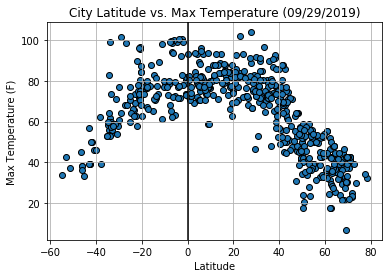

In [14]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Max Temp"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Max Temperature (09/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_max_temp.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

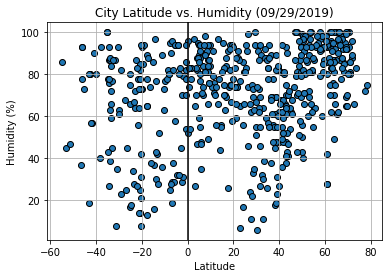

In [15]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Humidity"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Humidity (09/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_humidity.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

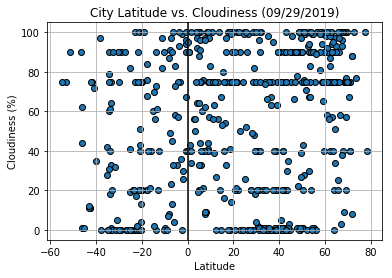

In [16]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Cloudiness"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Cloudiness (09/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_cloudiness.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

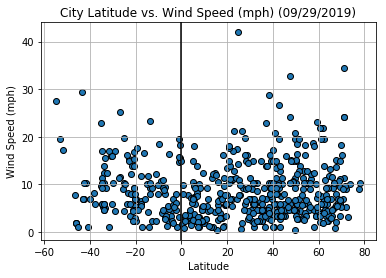

In [17]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Wind Speed"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Wind Speed (mph) (09/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Plot grid
plt.grid(True)

# Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_windspeed.png")

# Show the Figure
plt.show()